In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")
df.head()

Mounted at /content/drive


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


#KNighborsClassifier

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

drive.mount('/content/drive')

# 1. 讀取 CSV 資料
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)


# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 建立 KNeighborsClassifier 模型
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform', metric='minkowski')

# 6. 訓練模型
knn.fit(X_train_scaled, y_train)

# 7. 預測
y_pred = knn.predict(X_test_scaled)


# 8. 計算準確率
"""
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# knn.score(X_test_scaled, y_test) #與上方accuracy代表相同意義，只是knn.score會自己先將y_pred = knn.predict(X_test_scaled)得出，之後套用accuracy_score(y_test, y_pred)
"""

report_dict = classification_report(y_test, y_pred, output_dict=True)
for result in report_dict:
  print(f"{result}: {report_dict[result]}")

Mounted at /content/drive
blues: {'precision': 0.6086956521739131, 'recall': 0.7, 'f1-score': 0.6511627906976745, 'support': 20.0}
classical: {'precision': 0.6842105263157895, 'recall': 1.0, 'f1-score': 0.8125, 'support': 13.0}
country: {'precision': 0.5675675675675675, 'recall': 0.7777777777777778, 'f1-score': 0.65625, 'support': 27.0}
disco: {'precision': 0.4166666666666667, 'recall': 0.47619047619047616, 'f1-score': 0.4444444444444444, 'support': 21.0}
hiphop: {'precision': 0.3888888888888889, 'recall': 0.4666666666666667, 'f1-score': 0.42424242424242425, 'support': 15.0}
jazz: {'precision': 0.8333333333333334, 'recall': 0.45454545454545453, 'f1-score': 0.5882352941176471, 'support': 22.0}
metal: {'precision': 0.9, 'recall': 0.72, 'f1-score': 0.8, 'support': 25.0}
pop: {'precision': 0.6470588235294118, 'recall': 0.8461538461538461, 'f1-score': 0.7333333333333333, 'support': 13.0}
reggae: {'precision': 0.5714285714285714, 'recall': 0.34782608695652173, 'f1-score': 0.43243243243243246

#KNighborsRegressor

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

drive.mount('/content/drive')

# 1. 讀取 CSV 資料
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")


# 2. Encode the 'label' column to numerical values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
print("After label encoded")
display(df.head())


# 3. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)


# 4. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. 建立 KNeighborsRegressor 模型
knn = KNeighborsRegressor(n_neighbors=4, weights='uniform', metric='minkowski')

# 7. 訓練模型
knn.fit(X_train_scaled, y_train)

# 8. 預測
y_pred = knn.predict(X_test_scaled)

# 9. 計算準確率
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
After label encoded


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,0
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,0
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,0
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,0
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,0


Mean Squared Error: 5.79


#Gaussian Naive Bayes

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

drive.mount('/content/drive')

# 1. 讀取 CSV 資料
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")


# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 初始化 GaussianNB 分類器
gnb = GaussianNB()

# 5. 訓練模型
gnb.fit(X_train, y_train)

# 6. 進行預測
y_pred = gnb.predict(X_test)

# 7. 評估模型
"""
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
"""

report_dict = classification_report(y_test, y_pred, output_dict=True)
for result in report_dict:
  print(f"{result}: {report_dict[result]}")

Mounted at /content/drive
blues: {'precision': 0.21428571428571427, 'recall': 0.15, 'f1-score': 0.17647058823529413, 'support': 20.0}
classical: {'precision': 0.5, 'recall': 0.7692307692307693, 'f1-score': 0.6060606060606061, 'support': 13.0}
country: {'precision': 0.3333333333333333, 'recall': 0.2222222222222222, 'f1-score': 0.26666666666666666, 'support': 27.0}
disco: {'precision': 0.16666666666666666, 'recall': 0.047619047619047616, 'f1-score': 0.07407407407407407, 'support': 21.0}
hiphop: {'precision': 0.25, 'recall': 0.13333333333333333, 'f1-score': 0.17391304347826086, 'support': 15.0}
jazz: {'precision': 0.3888888888888889, 'recall': 0.3181818181818182, 'f1-score': 0.35, 'support': 22.0}
metal: {'precision': 0.46, 'recall': 0.92, 'f1-score': 0.6133333333333333, 'support': 25.0}
pop: {'precision': 0.28205128205128205, 'recall': 0.8461538461538461, 'f1-score': 0.4230769230769231, 'support': 13.0}
reggae: {'precision': 0.35294117647058826, 'recall': 0.2608695652173913, 'f1-score': 

#MultinomialNB

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

drive.mount('/content/drive')

# 1. 讀取 CSV 資料
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")


# 取得除了第一欄和最後一欄的欄位
columns_to_transform = df.columns[1:-1]  # 排除第一欄和最後一欄

# 平移處理，將每個選定欄位的最小值轉為非負數
for col in columns_to_transform:
    min_value = df[col].min()  # 計算最小值
    if min_value < 0:  # 如果最小值是負數，才進行平移
        df[col] = df[col] - min_value  # 將最小值平移到 0

display(df)


# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 初始化 MultinomialNB
model = MultinomialNB(alpha=1.0, fit_prior=True)

# 訓練模型
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 計算準確率
"""
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
"""

report_dict = classification_report(y_test, y_pred, output_dict=True)
for result in report_dict:
  print(f"{result}: {report_dict[result]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,525.134279,...,30.141839,13.720540,20.161562,11.364101,16.023754,10.398194,12.941620,10.933363,22.854190,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,318.203291,...,13.554649,31.501506,17.921328,18.357502,14.586388,12.671210,9.539208,21.821100,19.326718,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,330.261514,...,2.767504,14.890081,10.776868,10.285377,9.033338,2.545072,0.256434,7.478971,6.547943,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,344.855983,...,15.191979,27.927186,15.203901,12.356550,6.166134,7.983371,9.127424,17.085481,14.002596,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,406.629496,...,23.262445,17.071864,10.238289,10.761850,18.364723,12.466886,11.026693,18.529020,17.929888,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,510.662041,...,27.108327,13.386742,15.422929,8.067651,19.024851,9.027677,15.668789,14.830626,19.772002,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,430.653272,...,24.954747,17.430255,16.810010,8.196128,17.303290,6.674199,13.042187,16.849313,27.479427,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,424.117188,...,26.848941,19.156933,14.709792,11.207213,16.690972,11.901896,11.133506,13.838192,15.147526,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,453.707741,...,18.751091,15.033097,12.690110,16.770693,9.993487,8.596849,10.071895,16.307435,16.540055,rock


blues: {'precision': 0.10714285714285714, 'recall': 0.15, 'f1-score': 0.125, 'support': 20.0}
classical: {'precision': 0.3125, 'recall': 0.7692307692307693, 'f1-score': 0.4444444444444444, 'support': 13.0}
country: {'precision': 0.3333333333333333, 'recall': 0.1111111111111111, 'f1-score': 0.16666666666666666, 'support': 27.0}
disco: {'precision': 0.16666666666666666, 'recall': 0.047619047619047616, 'f1-score': 0.07407407407407407, 'support': 21.0}
hiphop: {'precision': 0.18181818181818182, 'recall': 0.13333333333333333, 'f1-score': 0.15384615384615385, 'support': 15.0}
jazz: {'precision': 0.4444444444444444, 'recall': 0.18181818181818182, 'f1-score': 0.25806451612903225, 'support': 22.0}
metal: {'precision': 0.5526315789473685, 'recall': 0.84, 'f1-score': 0.6666666666666666, 'support': 25.0}
pop: {'precision': 0.3055555555555556, 'recall': 0.8461538461538461, 'f1-score': 0.4489795918367347, 'support': 13.0}
reggae: {'precision': 0.2, 'recall': 0.08695652173913043, 'f1-score': 0.121212

#DecisionTreeClassifier

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 DecisionTreeClassifier 模型
model = DecisionTreeClassifier(criterion='gini', max_depth=5)

# 訓練模型
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估準確度
"""
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
"""

report_dict = classification_report(y_test, y_pred, output_dict=True)
for result in report_dict:
  print(f"{result}: {report_dict[result]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
blues: {'precision': 0.75, 'recall': 0.15, 'f1-score': 0.25, 'support': 20.0}
classical: {'precision': 0.7857142857142857, 'recall': 0.8461538461538461, 'f1-score': 0.8148148148148148, 'support': 13.0}
country: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 27.0}
disco: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 21.0}
hiphop: {'precision': 0.3225806451612903, 'recall': 0.6666666666666666, 'f1-score': 0.43478260869565216, 'support': 15.0}
jazz: {'precision': 0.47368421052631576, 'recall': 0.4090909090909091, 'f1-score': 0.43902439024390244, 'support': 22.0}
metal: {'precision': 0.9, 'recall': 0.72, 'f1-score': 0.8, 'support': 25.0}
pop: {'precision': 0.6111111111111112, 'recall': 0.8461538461538461, 'f1-score': 0.7096774193548387, 'support': 13.0}
reggae: {'precision': 0.27906976744186046, 'recall': 0.5217391304347826, 'f1-sco

#DecisionTreeRegressor

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. Encode the 'label' column to numerical values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
print("After label encoded")
display(df.head())

# 3. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 4. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 5. 初始化 DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=5)

# 6. 訓練模型
regressor.fit(X_train, y_train)

# 7. 預測
y_pred = regressor.predict(X_test)

# 8. 評估模型
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
After label encoded


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,0
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,0
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,0
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,0
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,0


Mean Squared Error: 7.27


#LinearSVC

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 建立 LinearSVC 模型
model = LinearSVC(C=1.0, max_iter=1000)

# 6. 訓練模型
model.fit(X_train_scaled, y_train)

# 7. 預測
y_pred = model.predict(X_test_scaled)

# 8. 評估模型
"""
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
"""

report_dict = classification_report(y_test, y_pred, output_dict=True)
for result in report_dict:
  print(f"{result}: {report_dict[result]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
blues: {'precision': 0.6470588235294118, 'recall': 0.55, 'f1-score': 0.5945945945945946, 'support': 20.0}
classical: {'precision': 0.7222222222222222, 'recall': 1.0, 'f1-score': 0.8387096774193549, 'support': 13.0}
country: {'precision': 0.5833333333333334, 'recall': 0.5185185185185185, 'f1-score': 0.5490196078431373, 'support': 27.0}
disco: {'precision': 0.6666666666666666, 'recall': 0.38095238095238093, 'f1-score': 0.48484848484848486, 'support': 21.0}
hiphop: {'precision': 0.47619047619047616, 'recall': 0.6666666666666666, 'f1-score': 0.5555555555555556, 'support': 15.0}
jazz: {'precision': 0.6666666666666666, 'recall': 0.7272727272727273, 'f1-score': 0.6956521739130435, 'support': 22.0}
metal: {'precision': 0.7857142857142857, 'recall': 0.88, 'f1-score': 0.8301886792452831, 'support': 25.0}
pop: {'precision': 0.6111111111111112, 'recall': 0.84615384615384

#SVC

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# 5. 初始化並訓練 SVC 模型
svc_model = SVC(kernel='rbf', C=10, gamma='scale')
svc_model.fit(X_train_scaled, y_train)

# 6. 預測
y_pred = svc_model.predict(X_test_scaled)

# 7. 評估模型準確度
"""
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
"""

report_dict = classification_report(y_test, y_pred, output_dict=True)
for result in report_dict:
  print(f"{result}: {report_dict[result]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
blues: {'precision': 0.6956521739130435, 'recall': 0.8, 'f1-score': 0.7441860465116279, 'support': 20.0}
classical: {'precision': 0.7333333333333333, 'recall': 0.8461538461538461, 'f1-score': 0.7857142857142857, 'support': 13.0}
country: {'precision': 0.7037037037037037, 'recall': 0.7037037037037037, 'f1-score': 0.7037037037037037, 'support': 27.0}
disco: {'precision': 0.7222222222222222, 'recall': 0.6190476190476191, 'f1-score': 0.6666666666666666, 'support': 21.0}
hiphop: {'precision': 0.5555555555555556, 'recall': 0.6666666666666666, 'f1-score': 0.6060606060606061, 'support': 15.0}
jazz: {'precision': 0.7894736842105263, 'recall': 0.6818181818181818, 'f1-score': 0.7317073170731707, 'support': 22.0}
metal: {'precision': 0.8148148148148148, 'recall': 0.88, 'f1-score': 0.8461538461538461, 'support': 25.0}
pop: {'precision': 0.75, 'recall': 0.9230769230769231,

#MLPClassifier

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立 MLP 模型
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=400)

# 訓練模型
mlp.fit(X_train_scaled, y_train)

# 預測
y_pred = mlp.predict(X_test_scaled)

# 評估模型
"""
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
"""

report_dict = classification_report(y_test, y_pred, output_dict=True)
for result in report_dict:
  print(f"{result}: {report_dict[result]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
blues: {'precision': 0.8235294117647058, 'recall': 0.7, 'f1-score': 0.7567567567567568, 'support': 20.0}
classical: {'precision': 0.7857142857142857, 'recall': 0.8461538461538461, 'f1-score': 0.8148148148148148, 'support': 13.0}
country: {'precision': 0.6785714285714286, 'recall': 0.7037037037037037, 'f1-score': 0.6909090909090909, 'support': 27.0}
disco: {'precision': 0.7142857142857143, 'recall': 0.47619047619047616, 'f1-score': 0.5714285714285714, 'support': 21.0}
hiphop: {'precision': 0.5238095238095238, 'recall': 0.7333333333333333, 'f1-score': 0.6111111111111112, 'support': 15.0}
jazz: {'precision': 0.7894736842105263, 'recall': 0.6818181818181818, 'f1-score': 0.7317073170731707, 'support': 22.0}
metal: {'precision': 0.7241379310344828, 'recall': 0.84, 'f1-score': 0.7777777777777778, 'support': 25.0}
pop: {'precision': 0.7058823529411765, 'recall': 0.92

#MLPRegressor

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. Encode the 'label' column to numerical values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
print("After label encoded")
display(df.head())

# 3. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 4. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. 初始化並訓練 MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,50), activation='relu', solver='adam', max_iter=700)
mlp.fit(X_train_scaled, y_train)

# 7. 預測
y_pred = mlp.predict(X_test_scaled)

# 8. 評估模型
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
After label encoded


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,0
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,0
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,0
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,0
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,0


Mean Squared Error: 8.43


#RandomForestClassifier

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 初始化並訓練 RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None)
model.fit(X_train, y_train)

# 5. 預測測試集
y_pred = model.predict(X_test)

# 6. 評估模型性能
"""
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
"""

report_dict = classification_report(y_test, y_pred, output_dict=True)
for result in report_dict:
  print(f"{result}: {report_dict[result]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
blues: {'precision': 0.64, 'recall': 0.8, 'f1-score': 0.7111111111111111, 'support': 20.0}
classical: {'precision': 0.7647058823529411, 'recall': 1.0, 'f1-score': 0.8666666666666667, 'support': 13.0}
country: {'precision': 0.625, 'recall': 0.5555555555555556, 'f1-score': 0.5882352941176471, 'support': 27.0}
disco: {'precision': 0.7272727272727273, 'recall': 0.38095238095238093, 'f1-score': 0.5, 'support': 21.0}
hiphop: {'precision': 0.30434782608695654, 'recall': 0.4666666666666667, 'f1-score': 0.3684210526315789, 'support': 15.0}
jazz: {'precision': 0.5652173913043478, 'recall': 0.5909090909090909, 'f1-score': 0.5777777777777777, 'support': 22.0}
metal: {'precision': 0.7777777777777778, 'recall': 0.84, 'f1-score': 0.8076923076923077, 'support': 25.0}
pop: {'precision': 0.5, 'recall': 0.8461538461538461, 'f1-score': 0.6285714285714286, 'support': 13.0}
reggae

#GradientBoostingClassifier

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 GradientBoostingClassifier 模型
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

# 訓練模型
clf.fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)

# 計算準確度
"""
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
"""

report_dict = classification_report(y_test, y_pred, output_dict=True)
for result in report_dict:
  print(f"{result}: {report_dict[result]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
blues: {'precision': 0.6363636363636364, 'recall': 0.7, 'f1-score': 0.6666666666666666, 'support': 20.0}
classical: {'precision': 0.7222222222222222, 'recall': 1.0, 'f1-score': 0.8387096774193549, 'support': 13.0}
country: {'precision': 0.5555555555555556, 'recall': 0.5555555555555556, 'f1-score': 0.5555555555555556, 'support': 27.0}
disco: {'precision': 0.4666666666666667, 'recall': 0.3333333333333333, 'f1-score': 0.3888888888888889, 'support': 21.0}
hiphop: {'precision': 0.625, 'recall': 0.6666666666666666, 'f1-score': 0.6451612903225806, 'support': 15.0}
jazz: {'precision': 0.6086956521739131, 'recall': 0.6363636363636364, 'f1-score': 0.6222222222222222, 'support': 22.0}
metal: {'precision': 0.8695652173913043, 'recall': 0.8, 'f1-score': 0.8333333333333334, 'support': 25.0}
pop: {'precision': 0.6111111111111112, 'recall': 0.8461538461538461, 'f1-score': 0.

#GradientBoostingRegressor

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. Encode the 'label' column to numerical values
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
print("After label encoded")
display(df.head())

# 3. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 4. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 建立 GradientBoostingRegressor 模型
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# 訓練模型
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 計算均方誤差
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
After label encoded


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,0
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,0
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,0
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,0
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,0


Mean Squared Error: 5.48


#KFold

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 3. 特徵標準化
scaler = StandardScaler()

# 初始化 KFold
kf = KFold(n_splits=5, shuffle=True)

# 初始化 KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto')

# 用來記錄每個折的準確率
accuracies = []

# 應用 KFold
fold = 1
for train_index, test_index in kf.split(X):
    print(f"Fold {fold}")
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 訓練模型
    model.fit(X_train_scaled, y_train)

    # 預測
    y_pred = model.predict(X_test_scaled)

    # 計算準確率
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f'Accuracy: {accuracy * 100:.2f}%')
    fold += 1

# 平均準確率
print(f"\nAverage Accuracy: {np.mean(accuracies) * 100:.2f}%")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Fold 1
Accuracy: 54.00%
Fold 2
Accuracy: 64.50%
Fold 3
Accuracy: 60.50%
Fold 4
Accuracy: 61.50%
Fold 5
Accuracy: 60.50%

Average Accuracy: 60.20%


#ShuffleSplit

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 3. 特徵標準化
scaler = StandardScaler()

# 創建 ShuffleSplit 交叉驗證物件
ss = ShuffleSplit(n_splits=5, test_size=0.2)

# 初始化 KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto')

# 用來記錄每個折的準確率
accuracies = []
id = 1
for train_index, test_index in ss.split(X):
    # 劃分訓練集和測試集
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 訓練模型
    model.fit(X_train_scaled, y_train)

    # 測試模型
    y_pred = model.predict(X_test_scaled)

    # 計算準確率
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy of round {id}: {accuracy * 100:.2f}%')
    id += 1

# 輸出平均準確率
print(f"\nAverage Accuracy: {np.mean(accuracies) * 100:.2f}%")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy of round 1: 60.00%
Accuracy of round 2: 60.50%
Accuracy of round 3: 60.50%
Accuracy of round 4: 60.50%
Accuracy of round 5: 64.50%

Average Accuracy: 61.20%


#confusion_matrix

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

drive.mount('/content/drive')

# 1. 讀取 CSV 資料
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)


# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 建立 KNeighborsClassifier 模型
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto')

# 6. 訓練模型
knn.fit(X_train_scaled, y_train)

# 7. 預測
y_pred = knn.predict(X_test_scaled)

# 計算混淆矩陣
cm = confusion_matrix(y_true = y_test, y_pred = y_pred)

# 輸出結果
print("Confusion Matrix:")
print(cm)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Confusion Matrix:
[[14  0  1  1  0  0  0  0  1  3]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 2  1 21  1  0  1  0  0  0  1]
 [ 1  0  2 10  1  0  0  4  1  2]
 [ 1  0  1  3  7  0  0  1  1  1]
 [ 3  3  3  1  0 10  0  0  1  1]
 [ 1  0  0  2  1  0 18  0  0  3]
 [ 0  0  1  0  1  0  0 11  0  0]
 [ 1  2  3  3  5  1  0  0  8  0]
 [ 0  0  5  3  3  0  2  1  2  5]]


#classification_report

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

drive.mount('/content/drive')

# 1. 讀取 CSV 資料
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)


# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 建立 KNeighborsClassifier 模型
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto')

# 6. 訓練模型
knn.fit(X_train_scaled, y_train)

# 7. 預測
y_pred = knn.predict(X_test_scaled)

# 8. 計算準確率
report_dict = classification_report(y_true = y_test, y_pred = y_pred, output_dict=True)
for result in report_dict:
  print(f"{result}: {report_dict[result]}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
blues: {'precision': 0.6086956521739131, 'recall': 0.7, 'f1-score': 0.6511627906976745, 'support': 20.0}
classical: {'precision': 0.6842105263157895, 'recall': 1.0, 'f1-score': 0.8125, 'support': 13.0}
country: {'precision': 0.5675675675675675, 'recall': 0.7777777777777778, 'f1-score': 0.65625, 'support': 27.0}
disco: {'precision': 0.4166666666666667, 'recall': 0.47619047619047616, 'f1-score': 0.4444444444444444, 'support': 21.0}
hiphop: {'precision': 0.3888888888888889, 'recall': 0.4666666666666667, 'f1-score': 0.42424242424242425, 'support': 15.0}
jazz: {'precision': 0.8333333333333334, 'recall': 0.45454545454545453, 'f1-score': 0.5882352941176471, 'support': 22.0}
metal: {'precision': 0.9, 'recall': 0.72, 'f1-score': 0.8, 'support': 25.0}
pop: {'precision': 0.6470588235294118, 'recall': 0.8461538461538461, 'f1-score': 0.7333333333333333, 'support': 13.0}
r

#f1_score

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

drive.mount('/content/drive')

# 1. 讀取 CSV 資料
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")

# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)


# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 特徵標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. 建立 KNeighborsClassifier 模型
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto')

# 6. 訓練模型
knn.fit(X_train_scaled, y_train)

# 7. 預測
y_pred = knn.predict(X_test_scaled)

# 8. 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


f1_macro = f1_score(y_true = y_test, y_pred = y_pred, average='macro')
print(f"F1 Score (macro): {f1_macro:.2f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 58.50%
F1 Score (macro): 0.58


#precision_recall_curve

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


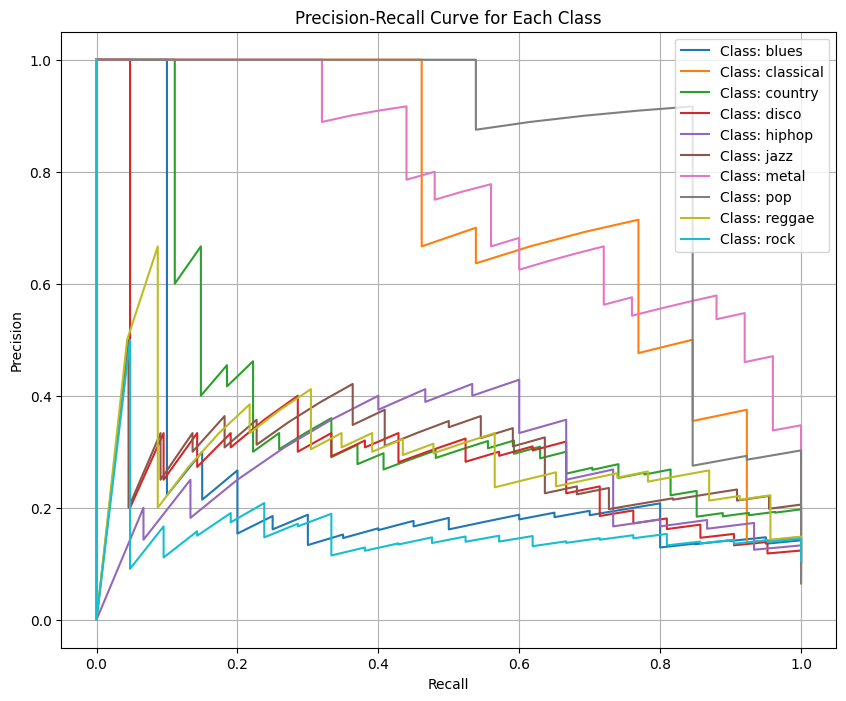

In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# 1. 讀取 CSV 資料
df = pd.read_csv("/content/drive/My Drive/data mining HW7/data.csv")


# 2. 特徵與標籤分離
X = df.iloc[:, 1:-1]  # 特徵 (除第一列和最後一列外的其他列)
y = df.iloc[:, -1]   # 標籤 (最後一列)

# 將標籤轉為數字格式
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# 3. 分割成訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 4. 初始化 GaussianNB 分類器
gnb = GaussianNB()

# 5. 訓練模型
gnb.fit(X_train, y_train)

# 6. 進行預測
y_pred = gnb.predict(X_test)

# 預測測試集的機率
y_scores = gnb.predict_proba(X_test)

# 將每個類別的 precision-recall 曲線計算出來
precision, recall, thresholds = {}, {}, {}

for i, class_label in enumerate(label_encoder.classes_):
    precision[class_label], recall[class_label], thresholds[class_label] = precision_recall_curve(y_test == i, y_scores[:, i])

# Visualize precision-recall curves
plt.figure(figsize=(10, 8))
for class_label in label_encoder.classes_:
    plt.plot(recall[class_label], precision[class_label], label=f'Class: {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Each Class')
plt.legend()
plt.grid()
plt.show()